In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

In [3]:
centroid = pd.read_csv("centroidAll.csv").to_numpy()

In [4]:
StopList = pd.read_csv("StopListAll.csv")

In [5]:
avg = pd.read_csv("avgAll.csv").to_numpy()

In [6]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

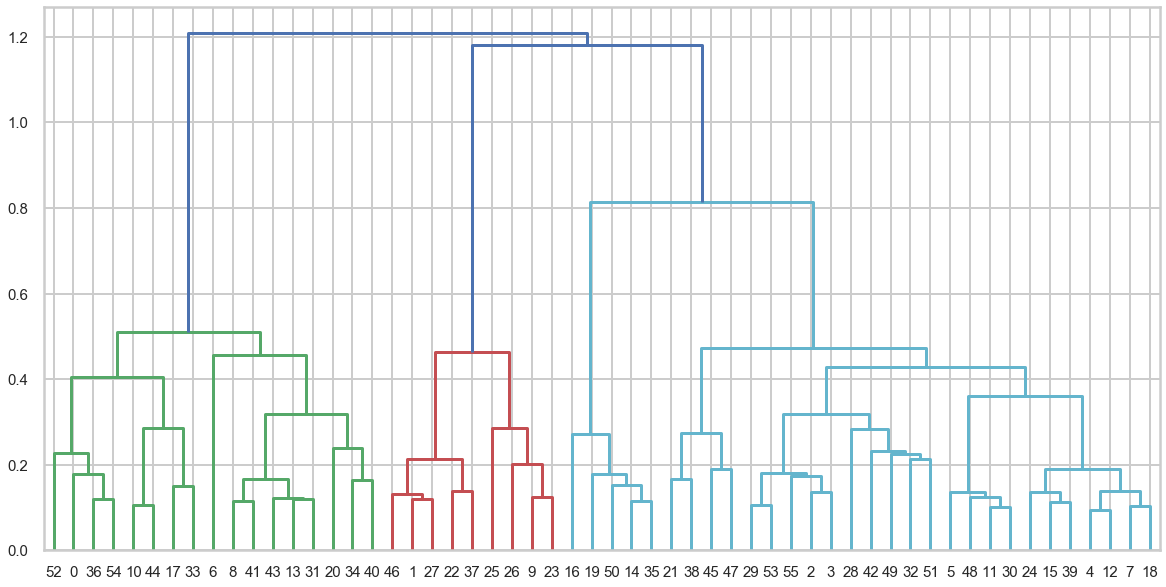

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(centroid)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level")
plt.tick_params(labelsize=15)
plt.xticks(rotation=0)
plt.savefig('DendogramAll.png', bbox_inches='tight')
plt.show()

In [8]:
clusters = [32, 4, 47, 0, 22, 2, 18, 28, 48, 41, 25, 27, 31, 36, 30, 16, 45, 13, 39, 44, 17, 9, 24, 51, 26, 37, 8, 49, 35, 53, 55, 6, 52, 20, 11, 38, 42, 50, 40, 21, 7, 46, 43, 10, 54, 12, 15, 19, 29, 33, 34, 5, 23, 1, 3, 14]

In [9]:
#check clusters
print(len(clusters)) #length
print(len(set(clusters))) #unqiue values

56
56


In [10]:
avgHierarchical = np.zeros(np.shape(avg))

In [11]:
for i in range(0,len(clusters)):
    avgHierarchical[:,i] = avg[:,clusters[i]]

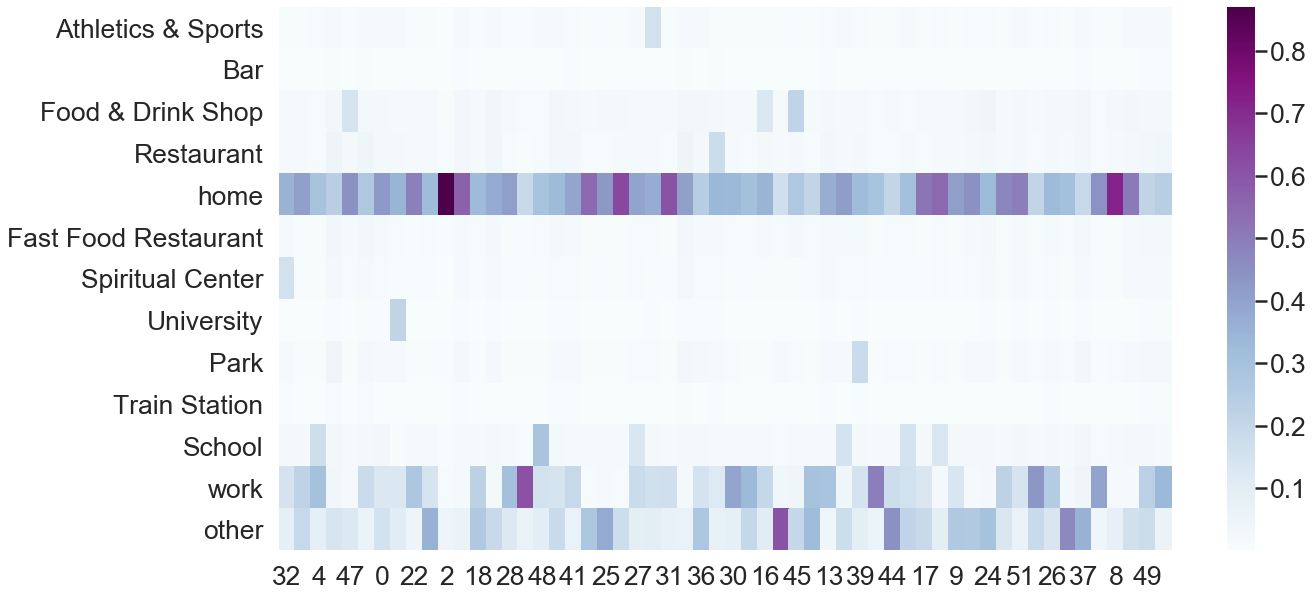

In [12]:
#heatmap without log
ax = sns.heatmap(avgHierarchical, cmap="BuPu")
ax.set_yticklabels(StopList.Stop.tolist())
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
ax.set_xticklabels(clusters)
plt.savefig('HierarchicalKmeanheatmapAll.png', bbox_inches='tight')
plt.show()

In [13]:
import matplotlib as mpl

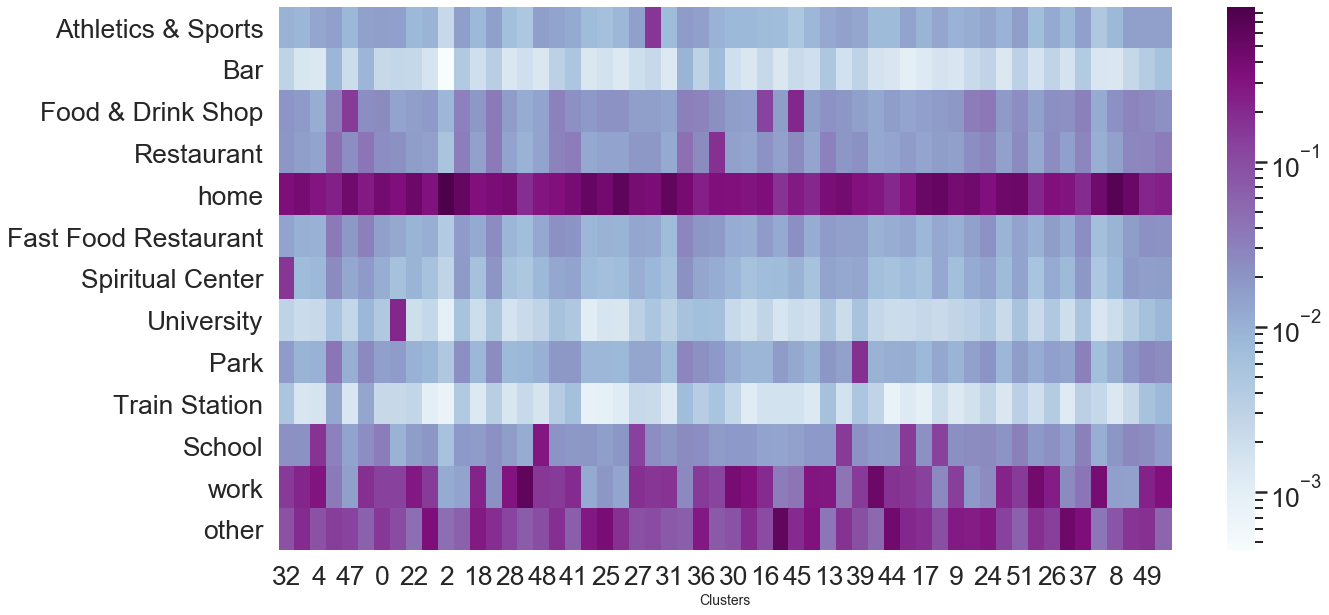

In [14]:
ax = sns.heatmap(avgHierarchical, cmap="BuPu", norm=mpl.colors.LogNorm())
ax.set_yticklabels(StopList.Stop.tolist())
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
plt.xlabel('Clusters', fontsize = 14)
ax.set_xticklabels(clusters)
plt.savefig('HierarchicalKmeanheatmapAllLog.png', bbox_inches='tight')
plt.show()